# Inference using MMSegmentation

The first step to develop a solution is just try any model that is available online.

**Goal: Try running road segmentation inference on a sample of KITTI dataset, using any model from MMSegmentation, and evaluate the results visually.**

## Step 1. Prepare test data

In [1]:
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/raw_data/2011_09_26_drive_0013/2011_09_26_drive_0013_extract.zip .

--2024-08-19 03:07:44--  https://s3.eu-central-1.amazonaws.com/avg-kitti/raw_data/2011_09_26_drive_0013/2011_09_26_drive_0013_extract.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 3.5.134.128, 52.219.171.181, 52.219.169.165, ...
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|3.5.134.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 939308309 (896M) [application/zip]
Saving to: ‘2011_09_26_drive_0013_extract.zip’

2011_09_26_drive_00 100%[===================>] 895.79M  19.9MB/s    in 59s     

2024-08-19 03:08:45 (15.1 MB/s) - ‘2011_09_26_drive_0013_extract.zip’ saved [939308309/939308309]

--2024-08-19 03:08:45--  http://./
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
FINISHED --2024-08-19 03:08:45--
Total wall clock time: 1m 0s
Downloaded: 1 files, 896M in 59s (15.1 MB/s)


In [2]:
!unzip 2011_09_26_drive_0013_extract.zip

Archive:  2011_09_26_drive_0013_extract.zip
   creating: 2011_09_26/2011_09_26_drive_0013_extract/oxts/
 extracting: 2011_09_26/2011_09_26_drive_0013_extract/oxts/timestamps.txt  
 extracting: 2011_09_26/2011_09_26_drive_0013_extract/oxts/dataformat.txt  
   creating: 2011_09_26/2011_09_26_drive_0013_extract/oxts/data/
 extracting: 2011_09_26/2011_09_26_drive_0013_extract/oxts/data/0000001030.txt  
 extracting: 2011_09_26/2011_09_26_drive_0013_extract/oxts/data/0000001169.txt  
 extracting: 2011_09_26/2011_09_26_drive_0013_extract/oxts/data/0000000210.txt  
 extracting: 2011_09_26/2011_09_26_drive_0013_extract/oxts/data/0000000145.txt  
 extracting: 2011_09_26/2011_09_26_drive_0013_extract/oxts/data/0000000013.txt  
 extracting: 2011_09_26/2011_09_26_drive_0013_extract/oxts/data/0000000166.txt  
 extracting: 2011_09_26/2011_09_26_drive_0013_extract/oxts/data/0000000247.txt  
 extracting: 2011_09_26/2011_09_26_drive_0013_extract/oxts/data/0000001450.txt  
 extracting: 2011_09_26/2011_09

In [3]:
# change the source directory name to the one that you extracted
# copy the images to `content/images`
!cp -r "/content/2011_09_26/2011_09_26_drive_0013_extract/image_02/data" "/content/images"

## Step 2. Install MMSegmentation

Just follow the step in the documentation [here](https://mmsegmentation.readthedocs.io/en/latest/get_started.html).

In [1]:
!pip install -U openmim
!mim install mmengine
# !mim install "mmcv>=2.0.0"
!mim install "mmcv>=2.0.0rc4,<2.2.0"
!pip install ftfy
!git clone -b main https://github.com/open-mmlab/mmsegmentation.git
!pip install "mmsegmentation>=1.0.0"
!mim install mmdet

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.3.0/index.html
  Using cached mmengine-0.10.4-py3-none-any.whl.metadata (20 kB)
  Using cached addict-2.4.0-py3-none-any.whl.metadata (1.0 kB)
  Using cached yapf-0.40.2-py3-none-any.whl.metadata (45 kB)
Using cached mmengine-0.10.4-py3-none-any.whl (451 kB)
Using cached addict-2.4.0-py3-none-any.whl (3.8 kB)
Using cached yapf-0.40.2-py3-none-any.whl (254 kB)
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.3.0/index.html
  Using cached mmcv-2.1.0.tar.gz (471 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for mmcv: filename=mmcv-2.1.0-cp310-cp310-linux_x86_64.whl size=38336379 sha256=ce79988cccb16e9c6461b28d1cca3903bf2442eff01e613d2425774fba77ef12
  Stored in directory: /root/.cache/pip/wheels/8b/09/35/94a7f7ba6a00e3810abd0492340e4cbba0ff3d443120a94120
Successfully built mmcv
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 3.4 MB/s eta 0:00:00
Cloning into 'mmsegmentati

## Step 3. Run inference

download the models

In [2]:
!wget -O pidnet-s.pth  https://download.openmmlab.com/mmsegmentation/v0.5/pidnet/pidnet-s_2xb6-120k_1024x1024-cityscapes/pidnet-s_2xb6-120k_1024x1024-cityscapes_20230302_191700-bb8e3bcc.pth
!wget -O pidnet-l.pth https://download.openmmlab.com/mmsegmentation/v0.5/pidnet/pidnet-l_2xb6-120k_1024x1024-cityscapes/pidnet-l_2xb6-120k_1024x1024-cityscapes_20230303_114514-0783ca6b.pth
!wget -O bisenetv2-def.pth https://download.openmmlab.com/mmsegmentation/v0.5/bisenetv2/bisenetv2_fcn_4x4_1024x1024_160k_cityscapes/bisenetv2_fcn_4x4_1024x1024_160k_cityscapes_20210902_015551-bcf10f09.pth
!wget -O mask2former-r50.pth https://download.openmmlab.com/mmsegmentation/v0.5/mask2former/mask2former_r50_8xb2-90k_cityscapes-512x1024/mask2former_r50_8xb2-90k_cityscapes-512x1024_20221202_140802-ffd9d750.pth
!wget -O mask2former-swinl.pth https://download.openmmlab.com/mmsegmentation/v0.5/mask2former/mask2former_swin-l-in22k-384x384-pre_8xb2-90k_cityscapes-512x1024/mask2former_swin-l-in22k-384x384-pre_8xb2-90k_cityscapes-512x1024_20221202_141901-28ad20f1.pth
!wget -O deeplabv3p-r101.pth https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3plus/deeplabv3plus_r101-d8_512x1024_80k_cityscapes/deeplabv3plus_r101-d8_512x1024_80k_cityscapes_20200606_114143-068fcfe9.pth
!wget -O ddrnet-slim.pth https://download.openmmlab.com/mmsegmentation/v0.5/ddrnet/ddrnet_23-slim_in1k-pre_2xb6-120k_cityscapes-1024x1024/ddrnet_23-slim_in1k-pre_2xb6-120k_cityscapes-1024x1024_20230426_145312-6a5e5174.pth

--2024-08-19 04:18:38--  https://download.openmmlab.com/mmsegmentation/v0.5/pidnet/pidnet-s_2xb6-120k_1024x1024-cityscapes/pidnet-s_2xb6-120k_1024x1024-cityscapes_20230302_191700-bb8e3bcc.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 163.181.199.241, 163.181.199.242, 163.181.199.243, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|163.181.199.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51073991 (49M) [application/octet-stream]
Saving to: ‘pidnet-s.pth’

pidnet-s.pth        100%[===================>]  48.71M  23.4MB/s    in 2.1s    

2024-08-19 04:18:40 (23.4 MB/s) - ‘pidnet-s.pth’ saved [51073991/51073991]

--2024-08-19 04:18:40--  https://download.openmmlab.com/mmsegmentation/v0.5/pidnet/pidnet-l_2xb6-120k_1024x1024-cityscapes/pidnet-l_2xb6-120k_1024x1024-cityscapes_20230303_114514-0783ca6b.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 163.181.199.241, 163.181.199.242, 163.181.199.243, ...
Connec

In [3]:
ALL_MODELS = {
  "ddrnet-slim": {
      "config": "/content/mmsegmentation/configs/ddrnet/ddrnet_23-slim_in1k-pre_2xb6-120k_cityscapes-1024x1024.py",
      "weights": "ddrnet-slim.pth",
      "image_size": "1024x1024",
  },
  "pidnet-s": {
      "config": "/content/mmsegmentation/configs/pidnet/pidnet-s_2xb6-120k_1024x1024-cityscapes.py",
      "weights": "pidnet-s.pth",
      "image_size": "1024x1024",
  },
  "pidnet-l": {
      "config": "/content/mmsegmentation/configs/pidnet/pidnet-l_2xb6-120k_1024x1024-cityscapes.py",
      "weights": "pidnet-l.pth",
      "image_size": "1024x1024",
  },
  "bisenetv2-def": {
      "config": "/content/mmsegmentation/configs/bisenetv2/bisenetv2_fcn_4xb4-160k_cityscapes-1024x1024.py",
      "weights": "bisenetv2-def.pth",
      "image_size": "1024x1024",
  },
  "mask2former-r50": {
      "config": "/content/mmsegmentation/configs/mask2former/mask2former_r101_8xb2-90k_cityscapes-512x1024.py",
      "weights": "mask2former-r50.pth",
      "image_size": "512x1024",
  },
  "mask2former-swinl": {
      "config": "/content/mmsegmentation/configs/mask2former/mask2former_swin-l-in22k-384x384-pre_8xb2-90k_cityscapes-512x1024.py",
      "weights": "mask2former-swinl.pth",
      "image_size": "512x1024",
  },
  "deeplabv3p-r101": {
      "config": "/content/mmsegmentation/configs/deeplabv3plus/deeplabv3plus_r101b-d8_4xb2-80k_cityscapes-512x1024.py",
      "weights": "deeplabv3p-r101.pth",
      "image_size": "512x1024",
  },
}

In [4]:
import json
import random
import shutil
import time
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
from mmseg.apis import init_model, inference_model
from tabulate import tabulate
from tqdm.notebook import tqdm

In [5]:
import mmcv
print(mmcv.__version__)

2.1.0


In [6]:
def process(
    model,
    image_path: Path,
    target_width: int = 512,
    target_height: int = 512,
    convert_bgr: bool = True
):
    # Load and optionally convert image
    img = cv2.imread(str(image_path))
    if convert_bgr:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize and crop image
    img = cv2.resize(img, (target_width, target_height))

    # Perform inference
    start = time.time()
    result = inference_model(model, img)
    infer_time = time.time() - start

    # Extract and process the road part
    segm = result.pred_sem_seg.data[0].cpu().numpy()
    mask = (segm == ROAD_LABEL).astype(np.uint8)

    # Get the largest road region
    _, lbl, stats, _ = cv2.connectedComponentsWithStats(mask, connectivity=8)
    largest_lbl = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1 if stats.shape[0] > 1 else -1
    mask = (lbl == largest_lbl).astype(np.uint8) * 255

    # Visualize results
    vis = cv2.addWeighted(img, 0.7, cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB), 0.3, 0)
    if not convert_bgr:
        vis = cv2.cvtColor(vis, cv2.COLOR_BGR2RGB)

    return vis, infer_time

The function process loads an image, resizes it, performs road segmentation using a given model, and visualizes the segmented road region, returning the visualization and the time taken for the model inference.

In [7]:
INPUT_DIR = Path("/content/images/")
INFER_TIME_DIR = Path("/content/times")
OUTPUT_DIR_ROOT = Path("/content/outputs/")
TARGET_SIZE = (375, 375)
ROAD_LABEL = 0

def save_data(data, path):
    path.parent.mkdir(parents=True, exist_ok=True)
    path.write_text(str(data))

def save_image(image, path):
    path.parent.mkdir(parents=True, exist_ok=True)
    cv2.imwrite(str(path), cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

In [8]:
def run_one_model(model_setting, model_name, convert_bgr=True):
    model = init_model(model_setting["config"], model_setting["weights"])
    infer_times = []

    for input_path in tqdm(INPUT_DIR.glob("*.png")):
        vis, infer_time = process(model, input_path, *TARGET_SIZE, convert_bgr)
        infer_times.append(infer_time)
        save_image(vis, OUTPUT_DIR_ROOT / model_name / input_path.name)

    save_data(np.mean(infer_times), INFER_TIME_DIR / f"{model_name}.txt")
    del model

In [9]:
shutil.rmtree(INFER_TIME_DIR, ignore_errors=True)
shutil.rmtree(OUTPUT_DIR_ROOT, ignore_errors=True)

for model_name, model_settings in ALL_MODELS.items():
    print(f"=== Working on {model_name} ====")
    run_one_model(model_settings, model_name)
    time.sleep(5)

=== Working on ddrnet-slim ====
Loads checkpoint by local backend from path: ddrnet-slim.pth


/usr/local/lib/python3.10/dist-packages/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '


0it [00:00, ?it/s]

=== Working on pidnet-s ====
Loads checkpoint by local backend from path: pidnet-s.pth


/usr/local/lib/python3.10/dist-packages/mmseg/models/losses/cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/mmseg/models/utils/wrappers.py:22: UserWarning: When align_corners=True, the output would more aligned if input size (128, 128) is `x+1` and out size (1024, 1024) is `nx+1`
  warnings.warn(


=== Working on pidnet-l ====
Loads checkpoint by local backend from path: pidnet-l.pth


0it [00:00, ?it/s]

=== Working on bisenetv2-def ====
Loads checkpoint by local backend from path: bisenetv2-def.pth


0it [00:00, ?it/s]

=== Working on mask2former-r50 ====
Loads checkpoint by local backend from path: mask2former-r50.pth
The model and loaded state dict do not match exactly

missing keys in source state_dict: backbone.layer3.6.conv1.weight, backbone.layer3.6.bn1.weight, backbone.layer3.6.bn1.bias, backbone.layer3.6.bn1.running_mean, backbone.layer3.6.bn1.running_var, backbone.layer3.6.conv2.weight, backbone.layer3.6.bn2.weight, backbone.layer3.6.bn2.bias, backbone.layer3.6.bn2.running_mean, backbone.layer3.6.bn2.running_var, backbone.layer3.6.conv3.weight, backbone.layer3.6.bn3.weight, backbone.layer3.6.bn3.bias, backbone.layer3.6.bn3.running_mean, backbone.layer3.6.bn3.running_var, backbone.layer3.7.conv1.weight, backbone.layer3.7.bn1.weight, backbone.layer3.7.bn1.bias, backbone.layer3.7.bn1.running_mean, backbone.layer3.7.bn1.running_var, backbone.layer3.7.conv2.weight, backbone.layer3.7.bn2.weight, backbone.layer3.7.bn2.bias, backbone.layer3.7.bn2.running_mean, backbone.layer3.7.bn2.running_var, backb

0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


=== Working on mask2former-swinl ====
Loads checkpoint by local backend from path: mask2former-swinl.pth


0it [00:00, ?it/s]

=== Working on deeplabv3p-r101 ====
Loads checkpoint by local backend from path: deeplabv3p-r101.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: backbone.stem.0.weight, backbone.stem.1.weight, backbone.stem.1.bias, backbone.stem.1.running_mean, backbone.stem.1.running_var, backbone.stem.1.num_batches_tracked, backbone.stem.3.weight, backbone.stem.4.weight, backbone.stem.4.bias, backbone.stem.4.running_mean, backbone.stem.4.running_var, backbone.stem.4.num_batches_tracked, backbone.stem.6.weight, backbone.stem.7.weight, backbone.stem.7.bias, backbone.stem.7.running_mean, backbone.stem.7.running_var, backbone.stem.7.num_batches_tracked

missing keys in source state_dict: backbone.conv1.weight, backbone.bn1.weight, backbone.bn1.bias, backbone.bn1.running_mean, backbone.bn1.running_var



0it [00:00, ?it/s]

Now, check all time measurements, and show some sample results

In [10]:
def print_times():
    time_collection = [
        [fpath.stem, ALL_MODELS[fpath.stem]["image_size"], float(fpath.read_text())]
        for fpath in INFER_TIME_DIR.glob("*")
    ]
    time_collection.sort(key=lambda x: x[2])

    print("Model inference time\n")
    print(tabulate(time_collection, headers=["Model", "Input Size", "Inference Time (Seconds)"], tablefmt="grid"))

print_times()

Model inference time

+-------------------+--------------+----------------------------+
| Model             | Input Size   |   Inference Time (Seconds) |
+===================+==============+============================+
| bisenetv2-def     | 1024x1024    |                  0.0144439 |
+-------------------+--------------+----------------------------+
| pidnet-s          | 1024x1024    |                  0.0211161 |
+-------------------+--------------+----------------------------+
| pidnet-l          | 1024x1024    |                  0.0221674 |
+-------------------+--------------+----------------------------+
| ddrnet-slim       | 1024x1024    |                  0.0234956 |
+-------------------+--------------+----------------------------+
| deeplabv3p-r101   | 512x1024     |                  0.0319563 |
+-------------------+--------------+----------------------------+
| mask2former-r50   | 512x1024     |                  0.221398  |
+-------------------+--------------+------------------

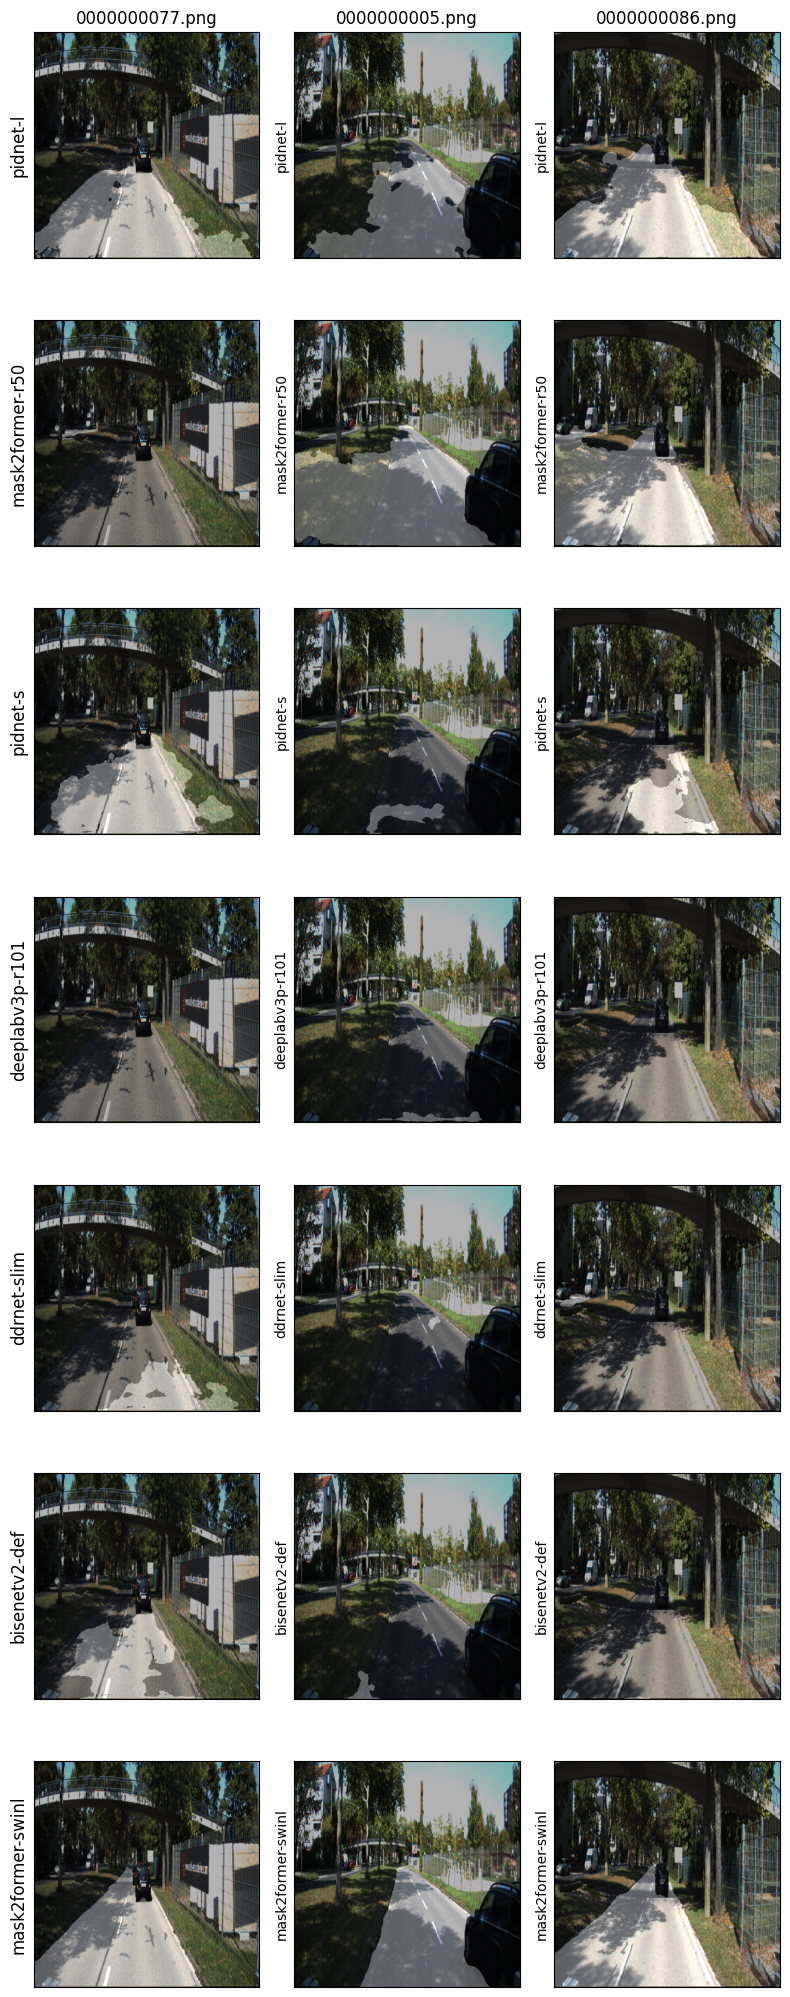

In [11]:
def show_samples(model_output_dirs):
    test_images = random.sample([img.name for img in INPUT_DIR.glob("*")], 3)

    fig, axs = plt.subplots(len(model_output_dirs), 3, figsize=(8, 3 * len(model_output_dirs)), tight_layout=True)
    for i, out in enumerate(model_output_dirs):
        for k, img_file in enumerate(test_images):
            axs[i, k].imshow(cv2.cvtColor(cv2.imread(str(out / img_file)), cv2.COLOR_BGR2RGB))
            axs[i, k].set_title(img_file if i == 0 else "")
            axs[i, k].set_ylabel(out.stem, rotation=90, size='large' if k == 0 else None)
            axs[i, k].set_xticks([])
            axs[i, k].set_yticks([])

model_output_dirs = list(OUTPUT_DIR_ROOT.glob("*"))
show_samples(model_output_dirs)

It can be seen that Bisenetv2, DDRNet, and PIDNet are models in the faster category, while Mask2Former is in the slower category. However, we can also see that the results of the fast models are quite poor in this dataset without training. While the slow model, Mask2Former with Swin-L can achieve good road segmentation even without training in the current dataset.

If we do not have inference time requirements, we can use Mask2Former for our application. However, since we are looking for a fast model, we will use one of Bisenetv2, DDRNet, or PIDNet. To improve accuracy, we will train the model.

Next, we would like to see whether our training makes the model better in this case.

In [29]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!cp "/content/iter_10000.pth" "/content/pidnet-s-trained.pth"
!cp "/content/pidnet-s_custom-config.py" "/content/pidnet-s-custom-config-backup.py"

In [30]:
ALL_MODELS["pidnet-s-trained"] = {
    "weights": "/content/pidnet-s-trained.pth",
    "config": "/content/pidnet-s_custom-config.py",
    "image_size": "384x384",
}

# In the configuration, the model preprocessing already convert BGR to RGB
ROAD_LABEL = 1
run_one_model(ALL_MODELS["pidnet-s-trained"], "pidnet-s-trained", convert_bgr=False)

Loads checkpoint by local backend from path: /content/pidnet-s-trained.pth


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/mmseg/models/utils/wrappers.py:22: UserWarning: When align_corners=True, the output would more aligned if input size (48, 48) is `x+1` and out size (384, 384) is `nx+1`
  warnings.warn(


Check the inference time

In [31]:
print_times()

Model inference time

+-------------------+--------------+----------------------------+
| Model             | Input Size   |   Inference Time (Seconds) |
+===================+==============+============================+
| bisenetv2-def     | 1024x1024    |                  0.0144439 |
+-------------------+--------------+----------------------------+
| pidnet-s-trained  | 384x384      |                  0.0176301 |
+-------------------+--------------+----------------------------+
| pidnet-s          | 1024x1024    |                  0.0211161 |
+-------------------+--------------+----------------------------+
| pidnet-l          | 1024x1024    |                  0.0221674 |
+-------------------+--------------+----------------------------+
| ddrnet-slim       | 1024x1024    |                  0.0234956 |
+-------------------+--------------+----------------------------+
| deeplabv3p-r101   | 512x1024     |                  0.0319563 |
+-------------------+--------------+------------------

Visualize some outputs

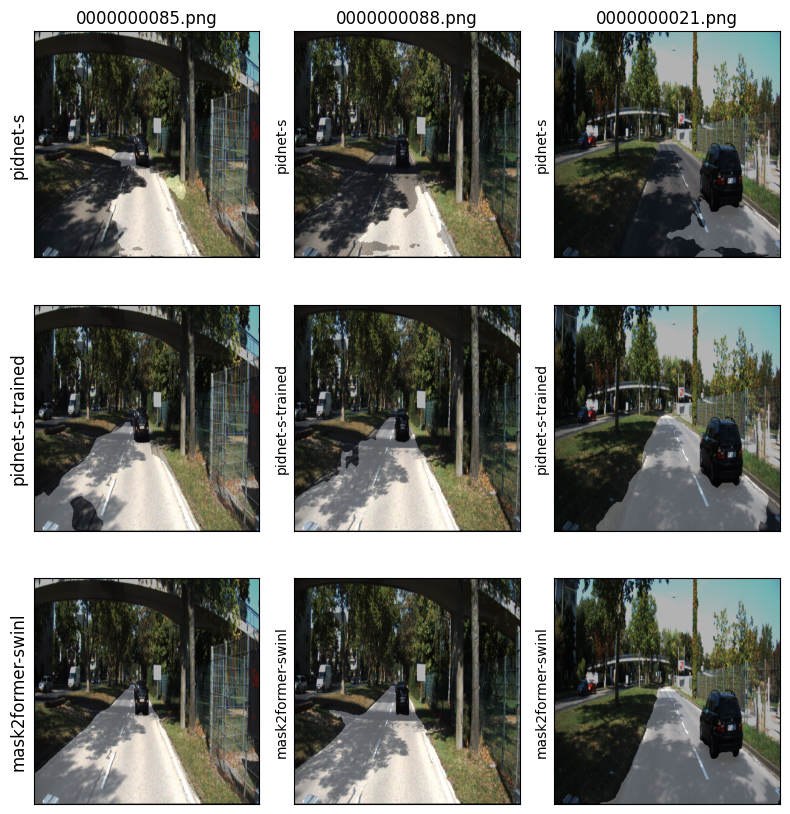

In [32]:
outputs_to_show = [
    Path("/content/outputs/pidnet-s"),
    Path("/content/outputs/pidnet-s-trained"),
    Path("/content/outputs/mask2former-swinl"),
]
show_samples(outputs_to_show)

The segmentation obviously looks much better, as good as Mask2Fromer which is significantly slower.